In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

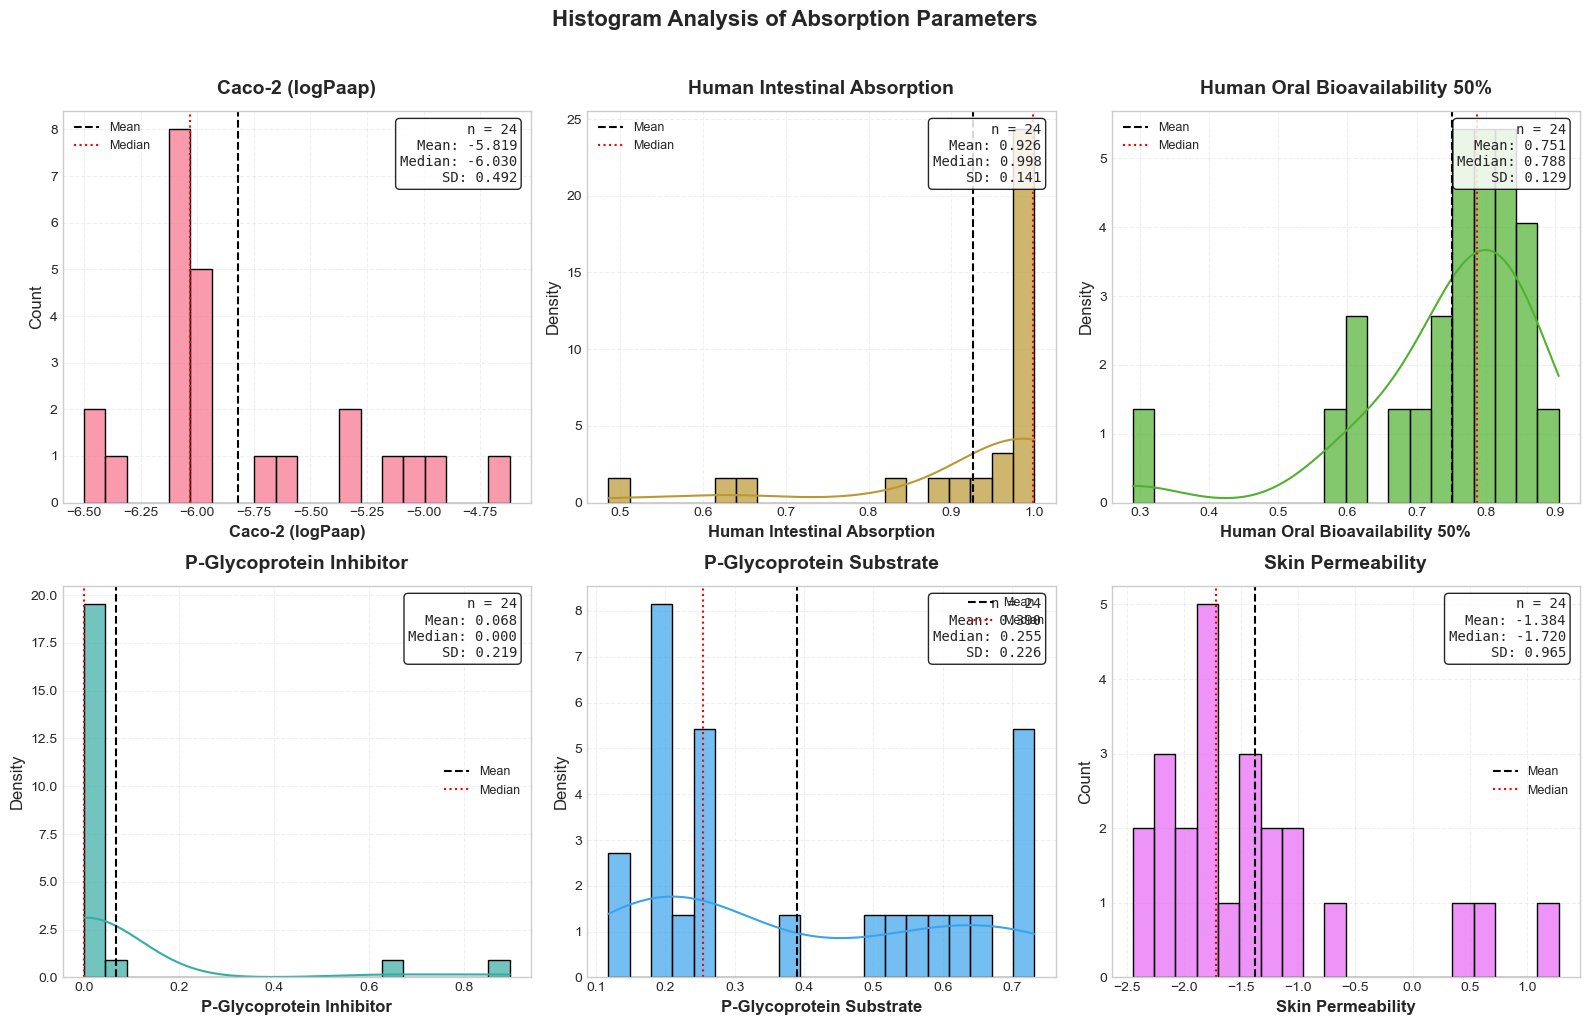

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# ==============================
# Read data
# ==============================
df = pd.read_csv('results_absorption.csv')

# ==============================
# Select Absorption columns
# ==============================
df_abs = df.loc[:, df.columns.str.startswith("[Absorption")]

# ==============================
# REMOVE SPECIFIC VARIABLES (REQUESTED)
# ==============================
cols_to_remove = [
    "[Absorption/Madin-Darby Canine Kidney] Predictions",
    "[Absorption/Human Oral Bioavailability 20%] Probability"
]

df_abs = df_abs.drop(columns=cols_to_remove, errors="ignore")

# ==============================
# Remove Interpretation columns
# ==============================
df_abs = df_abs.loc[:, ~df_abs.columns.str.contains("Interpretation", case=False)]

# ==============================
# Keep numeric only
# ==============================
df_abs = df_abs.select_dtypes(include="number")

# ==============================
# Variable classification (ORIGINAL names)
# ==============================
def classify_absorption_variable(col):
    col_l = col.lower()

    if "probability" in col_l:
        return "probability"

    if any(k in col_l for k in ["caco-2", "skin permeability", "madin-darby", "mdck"]):
        return "continuous"

    return "binary"

variable_types = {col: classify_absorption_variable(col) for col in df_abs.columns}

# ==============================
# Clean column names for plotting
# ==============================
def clean_abs_name(col):
    col = col.replace("[Absorption/", "")
    col = col.replace("] Predictions", "")
    col = col.replace("] Probability", "")
    return col.strip()

df_abs = df_abs.rename(columns=clean_abs_name)
variable_types = {clean_abs_name(k): v for k, v in variable_types.items()}

# ==============================
# Output directory
# ==============================
OUTPUT_DIR = "1.Absorción"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ==============================
# Plotting style (UNCHANGED)
# ==============================
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")

# ==============================
# Histogram plotting function (STYLE PRESERVED)
# ==============================
def create_histogram(ax, data, title, xlabel, color, var_type):
    data = data.dropna()

    use_density = var_type == "probability"

    sns.histplot(
        data,
        bins=20 if var_type != "binary" else 2,
        kde=use_density,
        stat="density" if use_density else "count",
        ax=ax,
        color=color,
        edgecolor="black",
        alpha=0.7
    )

    ax.set_title(title, fontsize=14, fontweight="bold", pad=12)
    ax.set_xlabel(xlabel, fontsize=12, fontweight="bold")
    ax.set_ylabel("Density" if use_density else "Count", fontsize=12)
    ax.grid(True, alpha=0.3, linestyle="--")
    ax.set_axisbelow(True)

    mean = data.mean()
    median = data.median()
    std = data.std()

    ax.axvline(mean, color="black", linestyle="--", linewidth=1.5, label="Mean")
    ax.axvline(median, color="red", linestyle=":", linewidth=1.5, label="Median")
    ax.legend(fontsize=9)

    text_str = (
        f"n = {len(data)}\n"
        f"Mean: {mean:.3f}\n"
        f"Median: {median:.3f}\n"
        f"SD: {std:.3f}"
    )

    ax.text(
        0.97, 0.97,
        text_str,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment="top",
        horizontalalignment="right",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.85),
        fontfamily="monospace"
    )

# ==============================
# Create plots (auto layout)
# ==============================
cols = list(df_abs.columns)
ncols = 3
nrows = int(np.ceil(len(cols) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 5 * nrows))
axes = axes.flatten()

palette = sns.color_palette()

for i, col in enumerate(cols):
    create_histogram(
        ax=axes[i],
        data=df_abs[col],
        title=col,
        xlabel=col,
        color=palette[i % len(palette)],
        var_type=variable_types[col]
    )

# Remove empty axes
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

# ==============================
# Global title & save
# ==============================
plt.suptitle(
    "Histogram Analysis of Absorption Parameters",
    fontsize=16,
    fontweight="bold",
    y=1.02
)

plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_DIR, "absorption_histograms2.png"),
    dpi=350,
    bbox_inches="tight"
)
plt.show()



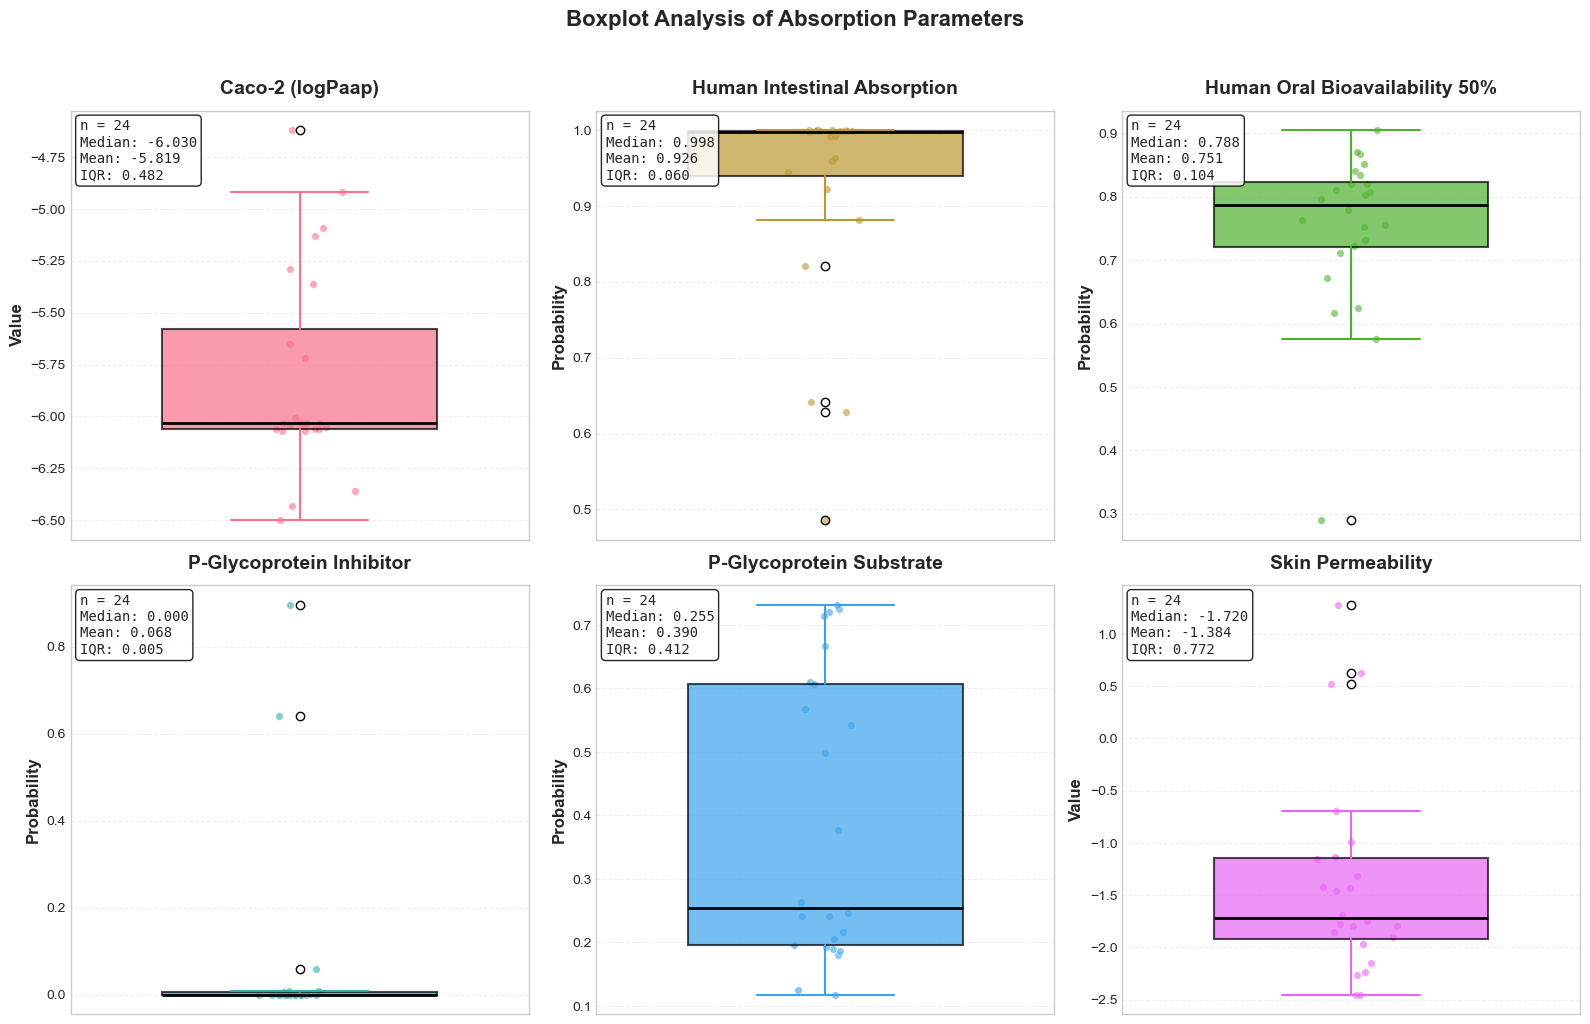

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# ==============================
# Read data
# ==============================
df = pd.read_csv('results_absorption.csv')

# ==============================
# Select Absorption columns
# ==============================
df_abs = df.loc[:, df.columns.str.startswith("[Absorption")]

# ==============================
# REMOVE SPECIFIC VARIABLES (EXACT)
# ==============================
cols_to_remove = [
    "[Absorption/Madin-Darby Canine Kidney] Predictions",
    "[Absorption/Human Oral Bioavailability 20%] Probability"
]

df_abs = df_abs.drop(columns=cols_to_remove, errors="ignore")

# ==============================
# Remove Interpretation columns
# ==============================
df_abs = df_abs.loc[:, ~df_abs.columns.str.contains("Interpretation", case=False)]

# ==============================
# Keep numeric variables only
# ==============================
df_abs = df_abs.select_dtypes(include="number")

# ==============================
# Classify variables (ORIGINAL names)
# ==============================
def classify_absorption_variable(col):
    col_l = col.lower()

    if "probability" in col_l:
        return "probability"

    if any(k in col_l for k in ["caco-2", "skin permeability", "madin-darby", "mdck"]):
        return "continuous"

    return "binary"

variable_types = {col: classify_absorption_variable(col) for col in df_abs.columns}

# ==============================
# Clean column names for plotting
# ==============================
def clean_abs_name(col):
    col = col.replace("[Absorption/", "")
    col = col.replace("] Predictions", "")
    col = col.replace("] Probability", "")
    return col.strip()

df_abs = df_abs.rename(columns=clean_abs_name)
variable_types = {clean_abs_name(k): v for k, v in variable_types.items()}

# ==============================
# Output directory
# ==============================
OUTPUT_DIR = "1.Absorción"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ==============================
# Plotting style
# ==============================
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("husl")

# ==============================
# Boxplot function
# ==============================
def create_boxplot(ax, data, title, ylabel, color, var_type):
    data = data.dropna()

    boxprops = dict(facecolor=color, alpha=0.7, linewidth=1.5)
    whiskerprops = dict(color=color, linewidth=1.5)
    capprops = dict(color=color, linewidth=1.5)
    medianprops = dict(color="black", linewidth=2)

    ax.boxplot(
        data,
        patch_artist=True,
        boxprops=boxprops,
        whiskerprops=whiskerprops,
        capprops=capprops,
        medianprops=medianprops,
        widths=0.6
    )

    x = np.random.normal(1, 0.04, size=len(data))
    ax.scatter(
        x,
        data,
        alpha=0.6,
        s=30,
        color=color,
        edgecolors="white",
        linewidth=0.5
    )

    ax.set_title(title, fontsize=14, fontweight="bold", pad=12)
    ax.set_ylabel(ylabel, fontsize=12, fontweight="bold")
    ax.set_xticks([])
    ax.grid(True, alpha=0.3, linestyle="--")
    ax.set_axisbelow(True)

    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)

    text_str = (
        f"n = {len(data)}\n"
        f"Median: {data.median():.3f}\n"
        f"Mean: {data.mean():.3f}\n"
        f"IQR: {(q3 - q1):.3f}"
    )

    ax.text(
        0.02, 0.98,
        text_str,
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.85),
        fontfamily="monospace"
    )

# ==============================
# Create boxplots
# ==============================
cols = list(df_abs.columns)
ncols = 3
nrows = int(np.ceil(len(cols) / ncols))

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 5 * nrows))
axes = axes.flatten()

palette = sns.color_palette()

for i, col in enumerate(cols):
    ylabel = "Probability" if variable_types[col] == "probability" else "Value"

    create_boxplot(
        ax=axes[i],
        data=df_abs[col],
        title=col,
        ylabel=ylabel,
        color=palette[i % len(palette)],
        var_type=variable_types[col]
    )

# Remove unused axes
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

# ==============================
# Global title & save
# ==============================
plt.suptitle(
    "Boxplot Analysis of Absorption Parameters",
    fontsize=16,
    fontweight="bold",
    y=1.02
)

plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_DIR, "absorption_boxplots2.png"),
    dpi=350,
    bbox_inches="tight"
)
plt.show()


C:\Users\Usuario X\AppData\Local\Temp\ipykernel_4536\3264222283.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Usuario X\AppData\Local\Temp\ipykernel_4536\3264222283.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Usuario X\AppData\Local\Temp\ipykernel_4536\3264222283.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\Usuario X\AppData\Local\Temp\ipykernel_4536\3264222283.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the 

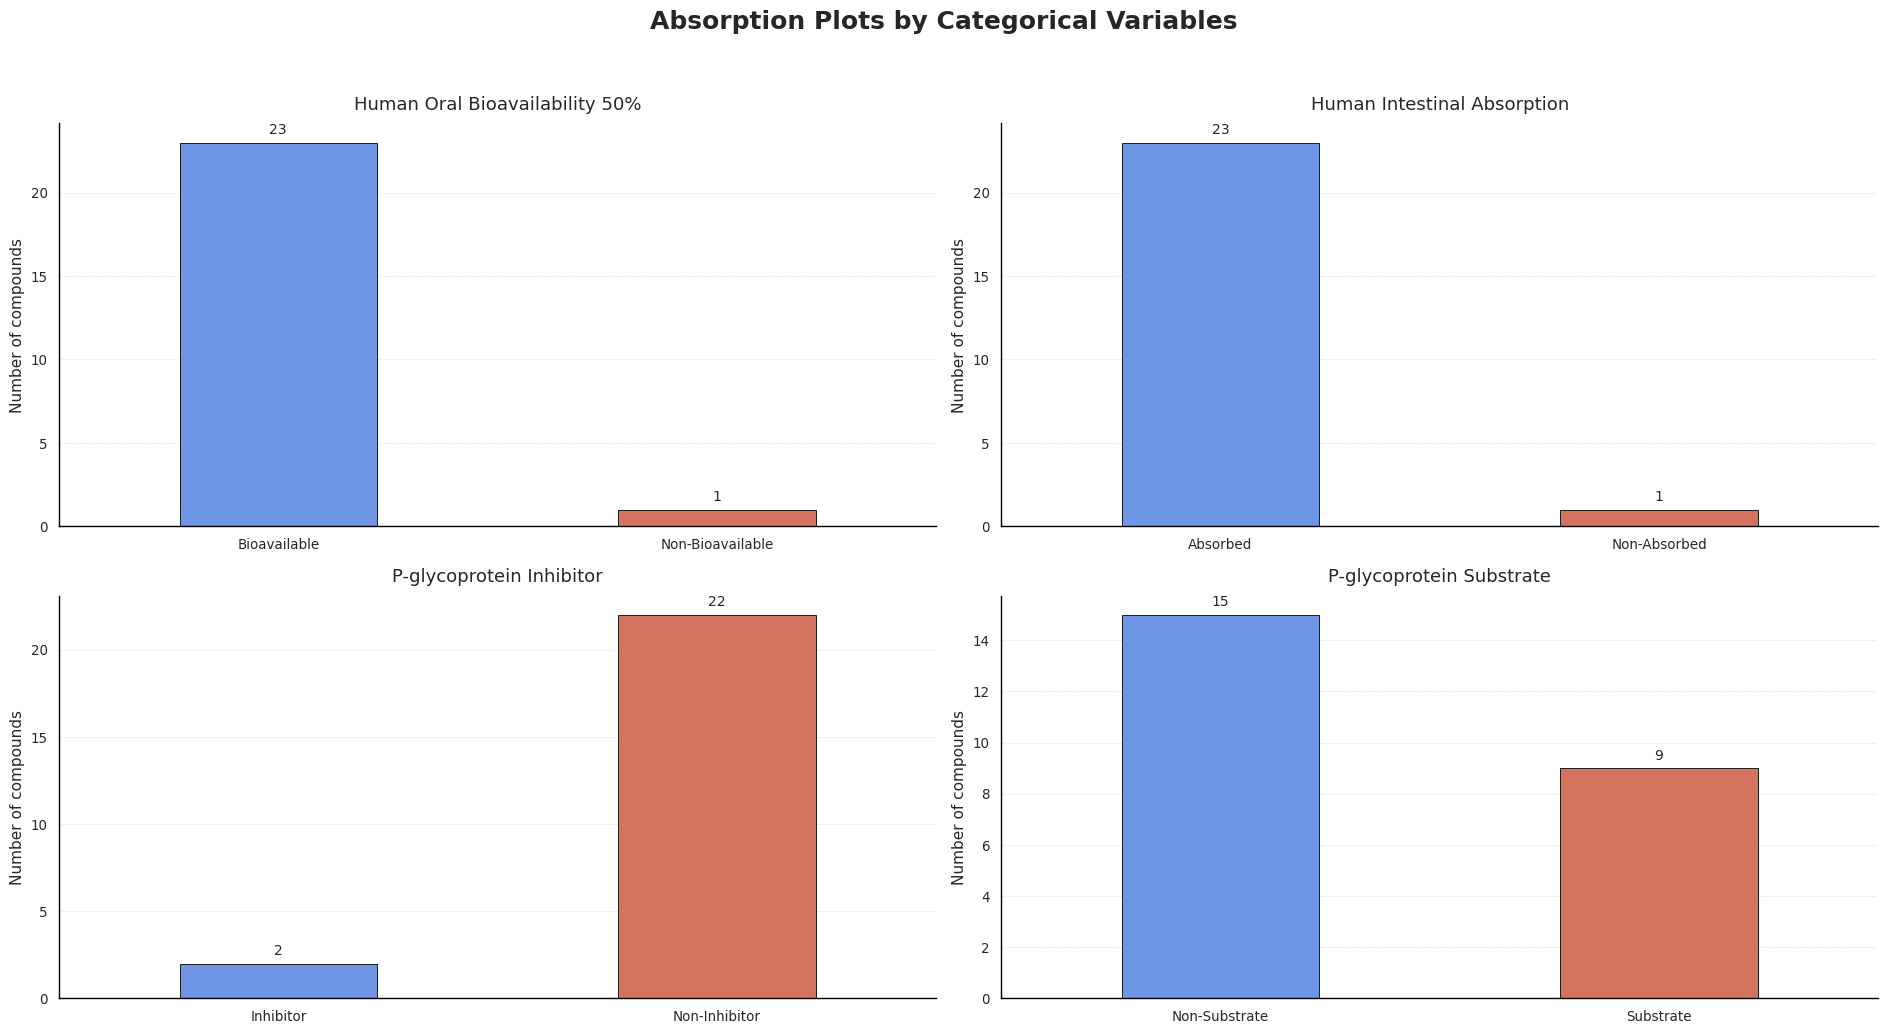

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

# ==============================
# Load data
# ==============================
df = pd.read_csv("results_absorption.csv")

# ==============================
# Output directory
# ==============================
OUTPUT_DIR = "1.Absorción"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# ==============================
# Interpretation columns
# ==============================
interpretation_cols = {
    "Human Oral Bioavailability 50%":
        "[Absorption/Human Oral Bioavailability 50%] Interpretation",
    "Human Intestinal Absorption":
        "[Absorption/Human Intestinal Absorption] Interpretation",
    "P-glycoprotein Inhibitor":
        "[Absorption/P-Glycoprotein Inhibitor] Interpretation",
    "P-glycoprotein Substrate":
        "[Absorption/P-Glycoprotein Substrate] Interpretation"
}

# ==============================
# Clean Interpretation labels
# ==============================
def clean_interpretation(text):
    if pd.isna(text):
        return text
    return re.sub(r"\s*\(.*?\)", "", text).strip()

# ==============================
# Global plotting style (refined)
# ==============================
plt.style.use("seaborn-v0_8-white")

sns.set_theme(
    context="paper",
    style="white",
    font="DejaVu Sans",
    font_scale=1.1,
    rc={
        "axes.linewidth": 1.0,
        "axes.edgecolor": "black",
        "grid.color": "#D0D0D0",
        "grid.linestyle": "--",
        "grid.linewidth": 0.7
    }
)

palette = ["#5B8FF9", "#E8684A"]  # restrained blue / muted red

# ==============================
# Figure layout
# ==============================
fig, axes = plt.subplots(2, 2, figsize=(19, 10))
axes = axes.flatten()

# ==============================
# Count plots
# ==============================
for ax, (endpoint, col) in zip(axes, interpretation_cols.items()):

    temp = (
        df[col]
        .dropna()
        .apply(clean_interpretation)
        .astype("category")
    )

    sns.countplot(
        x=temp,
        ax=ax,
        palette=palette,
        width=0.45,
        edgecolor="black",
        linewidth=0.6
    )

    # Titles and labels
    ax.set_title(endpoint, fontsize=13, pad=10)
    ax.set_xlabel("")
    ax.set_ylabel("Number of compounds", fontsize=11)

    # Axis cleanup
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.grid(axis="y", alpha=0.4)
    ax.grid(axis="x", visible=False)
    ax.set_axisbelow(True)

    # Count annotations (subtle)
    ymax = max(p.get_height() for p in ax.patches)
    offset = ymax * 0.015

    for p in ax.patches:
        ax.text(
            p.get_x() + p.get_width() / 2,
            p.get_height() + offset,
            f"{int(p.get_height())}",
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="medium"
        )

# Remove empty axes
for i in range(len(interpretation_cols), len(axes)):
    fig.delaxes(axes[i])

# ==============================
# Global title
# ==============================
plt.suptitle(
    "Absorption Plots by Categorical Variables",
    fontsize=18,
    fontweight="bold",
    y=1.03
)

plt.tight_layout()

# ==============================
# Save
# ==============================
plt.savefig(
    os.path.join(OUTPUT_DIR, "absorption_interpretation_counts2.png"),
    dpi=350,
    bbox_inches="tight"
)
plt.show()


C:\Users\Usuario X\anaconda3\envs\fac\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


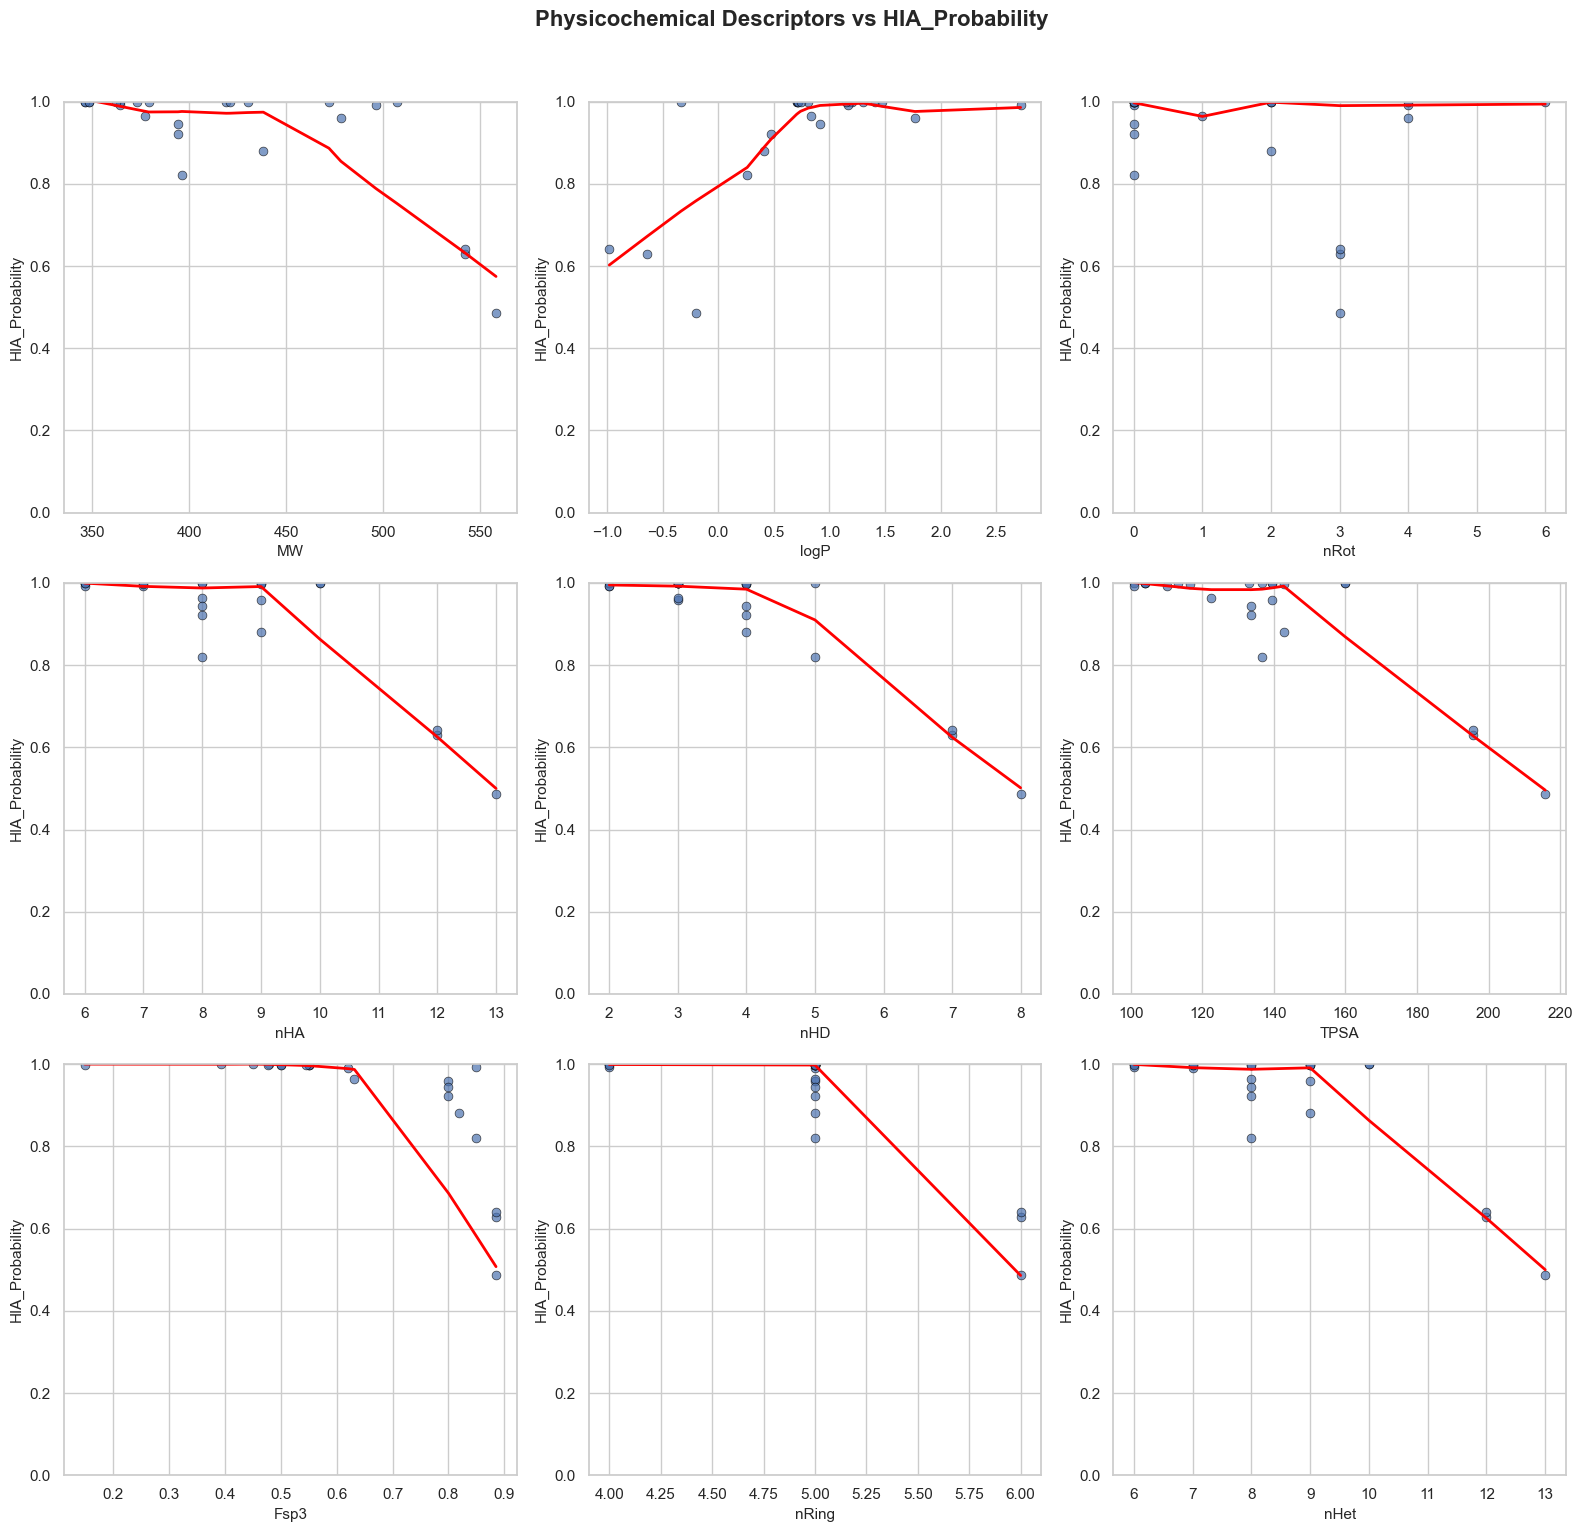

C:\Users\Usuario X\anaconda3\envs\fac\Lib\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


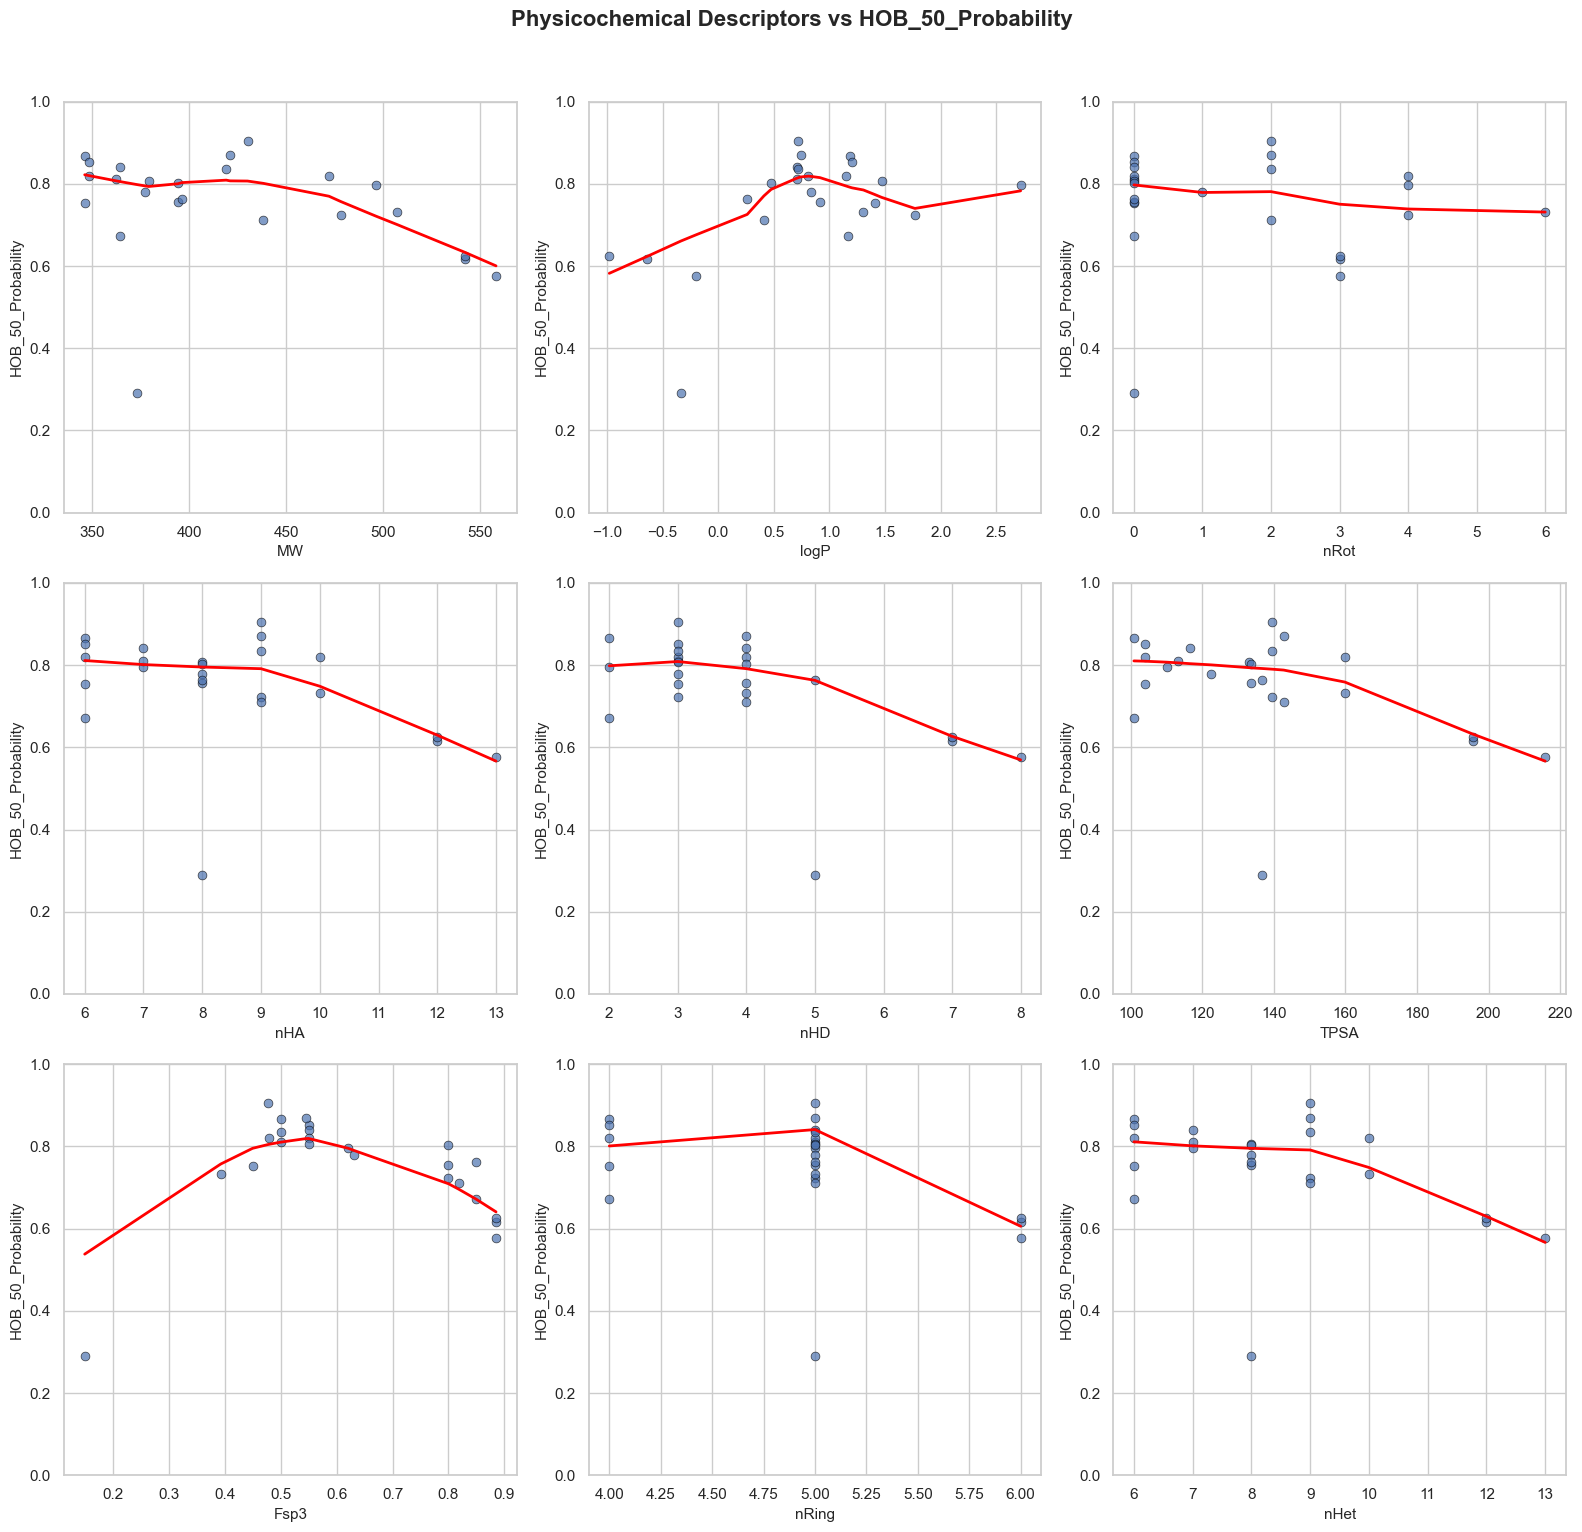

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

# =========================================================
# Configuration
# =========================================================
OUTPUT_DIR = "1.Absorción"
os.makedirs(OUTPUT_DIR, exist_ok=True)

DESCRIPTOR_FILE = "cuasinoides.xlsx"
DESCRIPTOR_SHEET = "ADMET"
ABSORPTION_FILE = "results_absorption.csv"

# =========================================================
# Descriptor variables (Excel)
# =========================================================
descriptor_cols = [
    "MW",
    "logP",
    "nRot",
    "nHA",
    "nHD",
    "TPSA",
    "Fsp3",
    "nRing",
    "nHet"
]

# =========================================================
# Absorption variables (CSV – RAW names)
# =========================================================
absorption_cols = [
    "[Absorption/Human Intestinal Absorption] Probability",
    "[Absorption/Human Oral Bioavailability 50%] Probability"
]

# =========================================================
# Read descriptor data (Excel)
# =========================================================
df_desc = pd.read_excel(
    DESCRIPTOR_FILE,
    sheet_name=DESCRIPTOR_SHEET
)

df_desc = df_desc[descriptor_cols].copy()

# =========================================================
# Read absorption data (CSV)
# =========================================================
df_abs = pd.read_csv(ABSORPTION_FILE)
df_abs = df_abs[absorption_cols].copy()

# =========================================================
# Clean absorption column names
# =========================================================
df_abs = df_abs.rename(columns={
    "[Absorption/Human Intestinal Absorption] Probability": "HIA_Probability",
    "[Absorption/Human Oral Bioavailability 50%] Probability": "HOB_50_Probability"
})

# =========================================================
# Merge descriptors + absorption data
# ASSUMPTION: same compound order in both files
# =========================================================
df = pd.concat([df_desc, df_abs], axis=1)

# =========================================================
# Convert to numeric and clean
# =========================================================
df = df.apply(pd.to_numeric, errors="coerce")

df = df.dropna(
    subset=["HIA_Probability", "HOB_50_Probability"],
    how="all"
)

# =========================================================
# Plot style
# =========================================================
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("notebook")

# =========================================================
# Bivariate plotting function
# =========================================================
def bivariate_plot(ax, x, y, x_label, y_label):
    sns.scatterplot(
        x=x,
        y=y,
        ax=ax,
        s=40,
        alpha=0.7,
        edgecolor="black"
    )

    # LOWESS trend
    sns.regplot(
        x=x,
        y=y,
        ax=ax,
        scatter=False,
        lowess=True,
        color="red",
        line_kws={"linewidth": 2}
    )

    ax.set_xlabel(x_label, fontsize=11)
    ax.set_ylabel(y_label, fontsize=11)
    ax.set_ylim(0, 1)

# =========================================================
# Generate plots
# =========================================================
descriptors = descriptor_cols
abs_vars = ["HIA_Probability", "HOB_50_Probability"]

for abs_var in abs_vars:
    ncols = 3
    nrows = int(np.ceil(len(descriptors) / ncols))

    fig, axes = plt.subplots(
        nrows,
        ncols,
        figsize=(16, 5 * nrows)
    )
    axes = axes.flatten()

    for i, desc in enumerate(descriptors):
        bivariate_plot(
            ax=axes[i],
            x=df[desc],
            y=df[abs_var],
            x_label=desc,
            y_label=abs_var
        )

    for j in range(len(descriptors), len(axes)):
        fig.delaxes(axes[j])

    plt.suptitle(
        f"Physicochemical Descriptors vs {abs_var}",
        fontsize=16,
        fontweight="bold",
        y=1.02
    )

    plt.tight_layout()
    plt.savefig(
        os.path.join(OUTPUT_DIR, f"bivariate_{abs_var}2.png"),
        dpi=350,
        bbox_inches="tight"
    )
    plt.show()



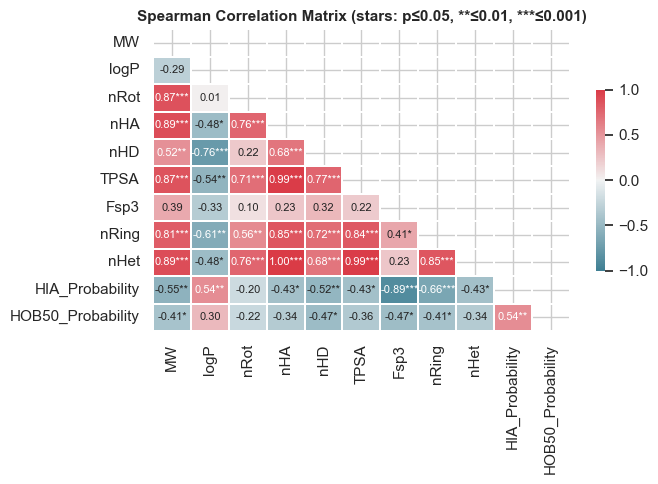

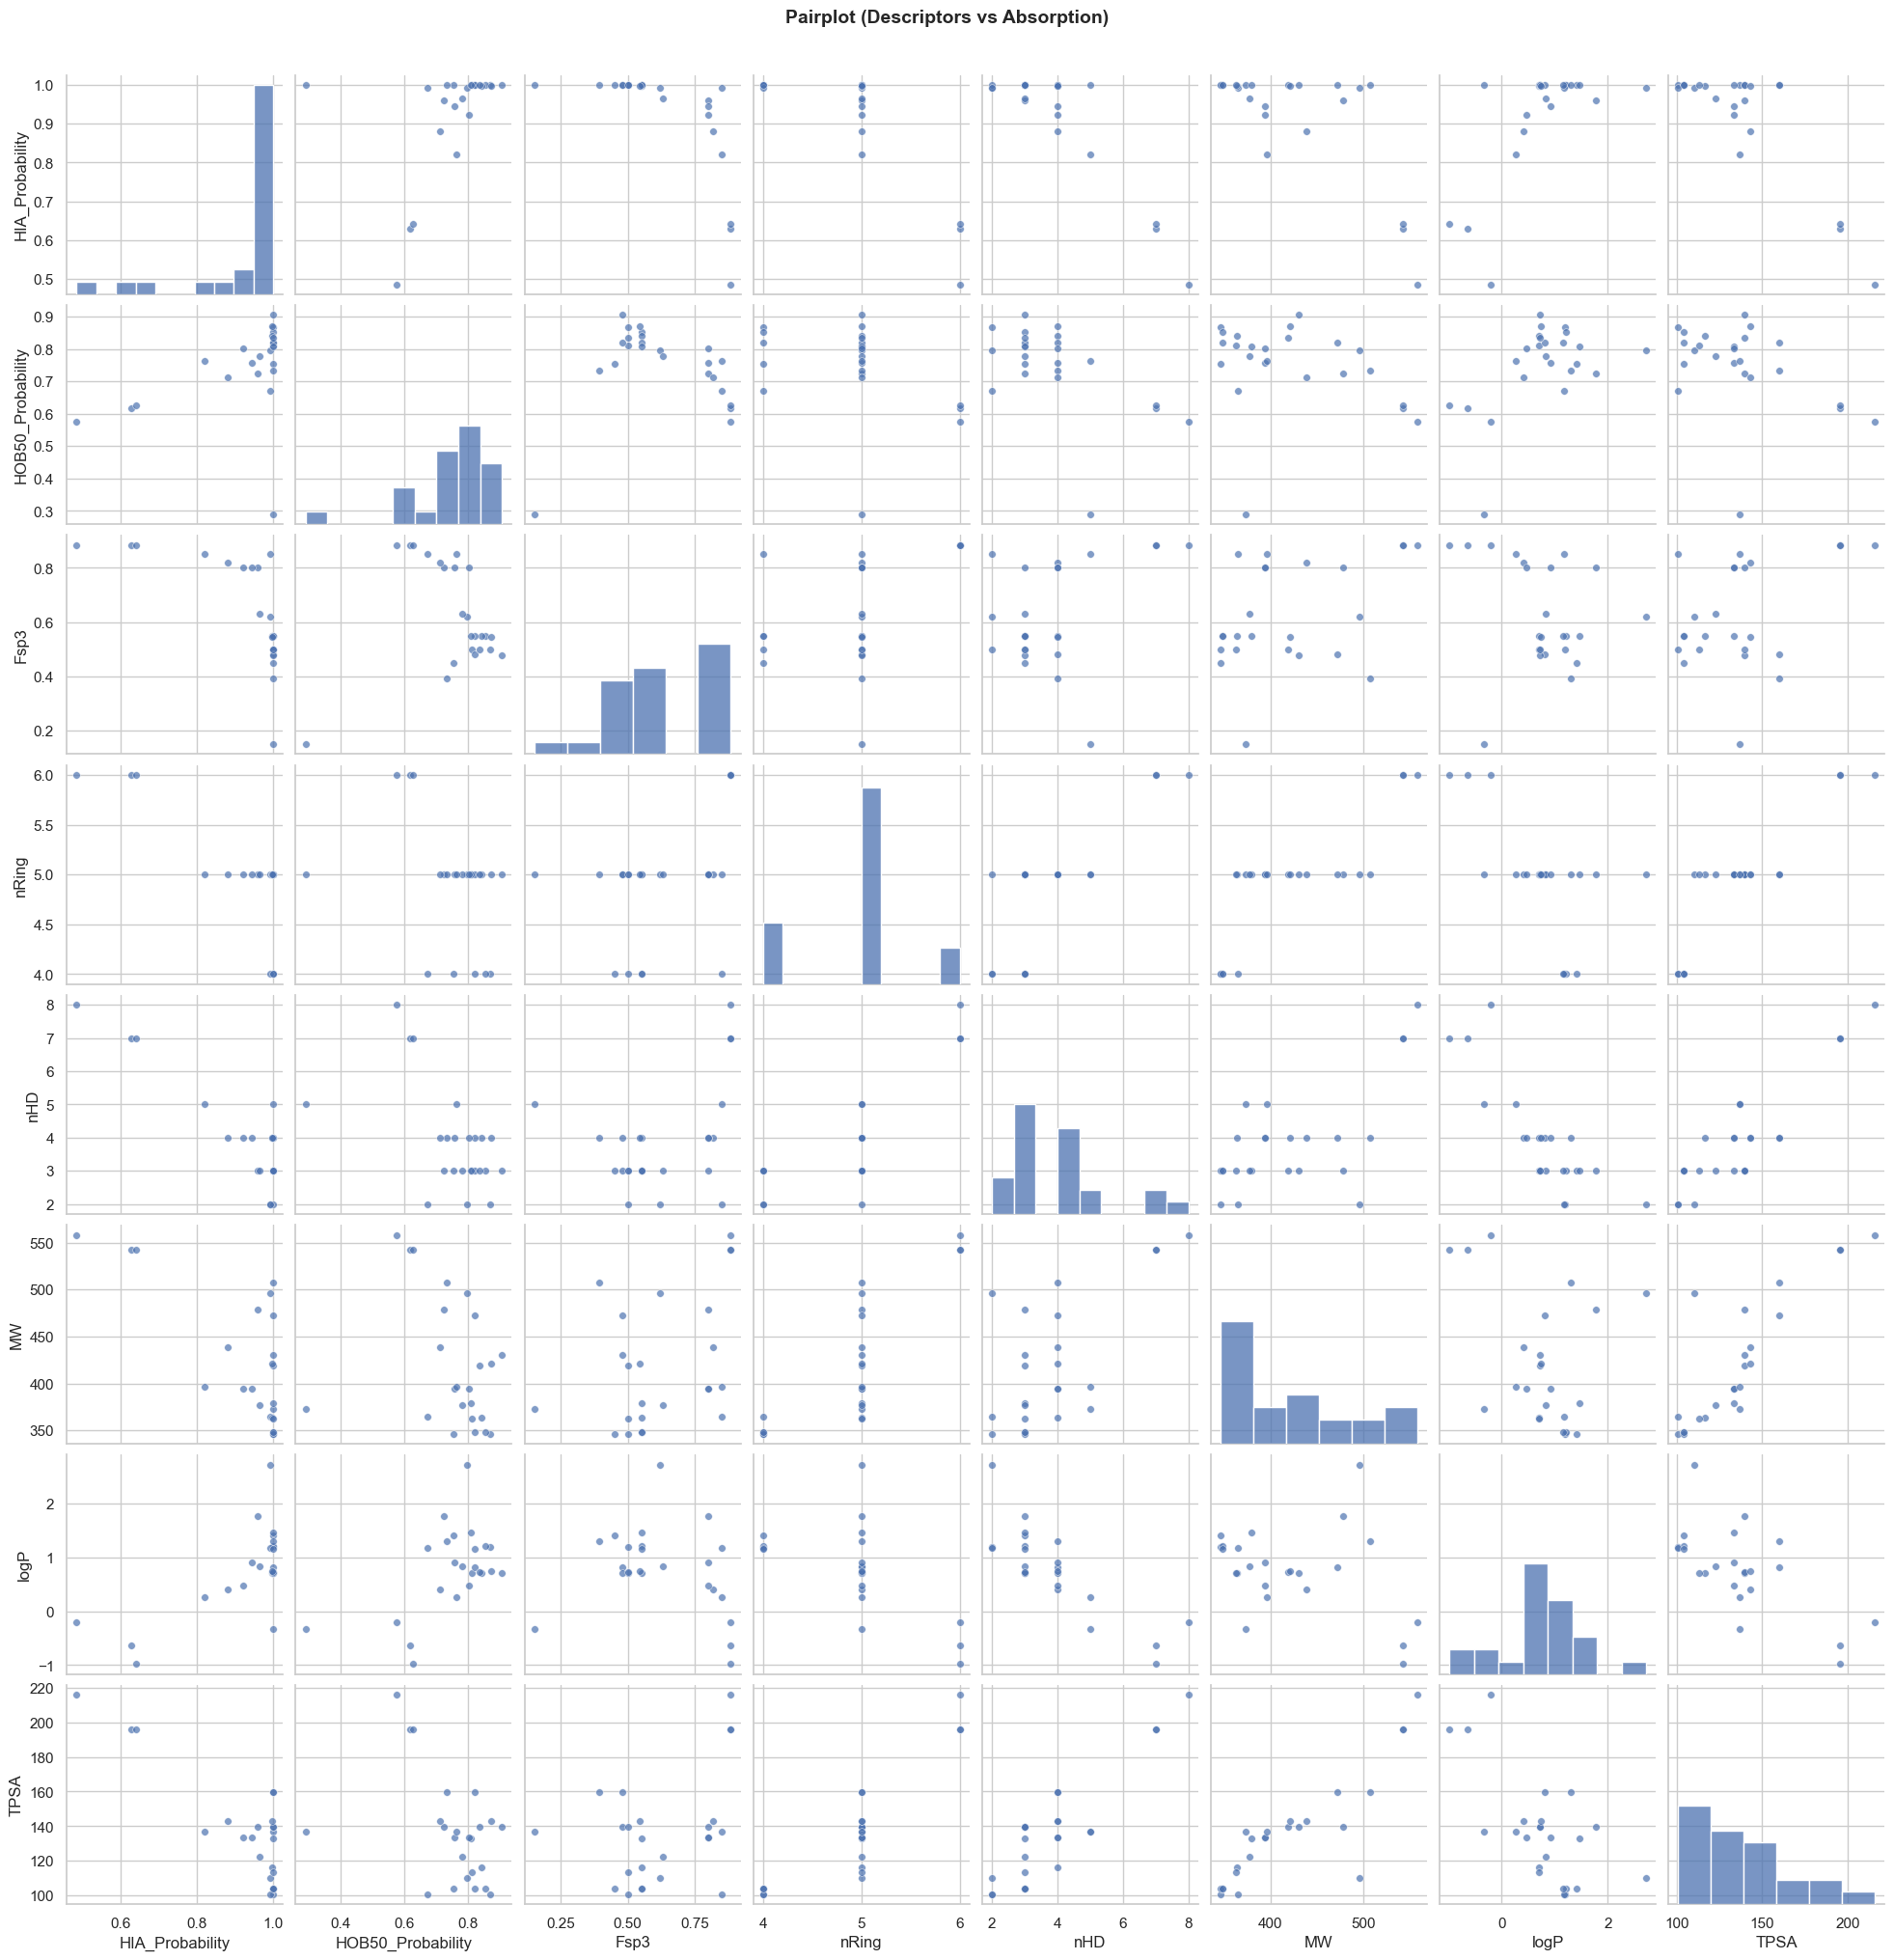

Saved outputs to: 1.Absorción


In [16]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import spearmanr

# =========================================================
# Configuration
# =========================================================
DESCRIPTOR_FILE = "cuasinoides.xlsx"
DESCRIPTOR_SHEET = "ADMET"
ABSORPTION_FILE = "results_absorption.csv"

OUTPUT_DIR = "1.Absorción"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# =========================================================
# Descriptor variables (Excel: ADMET)
# =========================================================
descriptor_cols = [
    "MW",
    "logP",
    "nRot",
    "nHA",
    "nHD",
    "TPSA",
    "Fsp3",
    "nRing",
    "nHet"
]

# =========================================================
# Absorption variables (CSV – RAW names)
# =========================================================
absorption_cols_raw = [
    "[Absorption/Human Intestinal Absorption] Probability",
    "[Absorption/Human Oral Bioavailability 50%] Probability"
]

# Pairplot limits
MAX_PAIRPLOT_VARS = 8
MAX_PAIRPLOT_ROWS = 2000

# =========================================================
# Read descriptor data (Excel)
# =========================================================
df_desc = pd.read_excel(
    DESCRIPTOR_FILE,
    sheet_name=DESCRIPTOR_SHEET
)

df_desc = df_desc[descriptor_cols].copy()

# =========================================================
# Read absorption data (CSV)
# =========================================================
df_abs = pd.read_csv(ABSORPTION_FILE)
df_abs = df_abs[absorption_cols_raw].copy()

df_abs = df_abs.rename(columns={
    "[Absorption/Human Intestinal Absorption] Probability": "HIA_Probability",
    "[Absorption/Human Oral Bioavailability 50%] Probability": "HOB50_Probability"
})

# =========================================================
# Merge descriptors + absorption
# ASSUMPTION: same compound order
# =========================================================
df = pd.concat([df_desc, df_abs], axis=1)

# =========================================================
# Convert to numeric and clean
# =========================================================
df = df.apply(pd.to_numeric, errors="coerce")

df = df.dropna(
    how="all",
    subset=["HIA_Probability", "HOB50_Probability"]
)

descriptor_cols_clean = descriptor_cols
absorption_cols = ["HIA_Probability", "HOB50_Probability"]

# =========================================================
# Compute Spearman correlation + p-values
# =========================================================
def spearman_corr_pval(df_in):
    cols = df_in.columns
    n = len(cols)

    corr = pd.DataFrame(np.zeros((n, n)), index=cols, columns=cols)
    pval = pd.DataFrame(np.ones((n, n)), index=cols, columns=cols)

    for i, a in enumerate(cols):
        for j, b in enumerate(cols):
            if i <= j:
                x = df_in[a]
                y = df_in[b]
                mask = x.notna() & y.notna()

                if mask.sum() < 3:
                    corr.loc[a, b] = np.nan
                    pval.loc[a, b] = np.nan
                else:
                    r, p = spearmanr(x[mask], y[mask])
                    corr.loc[a, b] = r
                    pval.loc[a, b] = p

                corr.loc[b, a] = corr.loc[a, b]
                pval.loc[b, a] = pval.loc[a, b]

    return corr, pval

corr_df, pval_df = spearman_corr_pval(
    df[descriptor_cols_clean + absorption_cols]
)

# =========================================================
# Plot: Spearman correlation heatmap
# =========================================================
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("notebook")

mask = np.triu(np.ones_like(corr_df, dtype=bool))

fig, ax = plt.subplots(
    figsize=(max(7, 0.5 * len(corr_df)),
             max(5, 0.4 * len(corr_df)))
)

cmap = sns.diverging_palette(220, 10, as_cmap=True)

def significance_stars(p):
    if pd.isna(p):
        return ""
    if p <= 0.001:
        return "***"
    if p <= 0.01:
        return "**"
    if p <= 0.05:
        return "*"
    return ""

annot = corr_df.round(2).astype(str)
for i in corr_df.index:
    for j in corr_df.columns:
        if not pd.isna(corr_df.loc[i, j]):
            annot.loc[i, j] = f"{corr_df.loc[i, j]:.2f}{significance_stars(pval_df.loc[i, j])}"
        else:
            annot.loc[i, j] = ""

sns.heatmap(
    corr_df,
    mask=mask,
    cmap=cmap,
    center=0,
    annot=annot,
    fmt="",
    annot_kws={"size": 8},
    linewidths=0.3,
    cbar_kws={"shrink": 0.6},
    vmax=1,
    vmin=-1,
    ax=ax
)

ax.set_title(
    "Spearman Correlation Matrix (stars: p≤0.05, **≤0.01, ***≤0.001)",
    fontsize=11,
    fontweight="bold"
)

plt.tight_layout()
plt.savefig(
    os.path.join(OUTPUT_DIR, "spearman_correlation.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()

# Save numeric matrices
corr_df.to_csv(os.path.join(OUTPUT_DIR, "spearman_correlation_matrix.csv"))
pval_df.to_csv(os.path.join(OUTPUT_DIR, "spearman_pvalues_matrix.csv"))

# =========================================================
# Variable selection for pairplot
# =========================================================
vars_for_pairplot = absorption_cols.copy()
remaining_slots = MAX_PAIRPLOT_VARS - len(vars_for_pairplot)
remaining_slots = max(1, remaining_slots)

if len(descriptor_cols_clean) <= remaining_slots:
    vars_for_pairplot += descriptor_cols_clean
else:
    avg_abs_corr = (
        corr_df.loc[descriptor_cols_clean, absorption_cols]
        .abs()
        .mean(axis=1)
    )
    top_descriptors = (
        avg_abs_corr
        .sort_values(ascending=False)
        .head(remaining_slots)
        .index
        .tolist()
    )
    vars_for_pairplot += top_descriptors

pairplot_df = df[vars_for_pairplot].dropna(how="all")

if len(pairplot_df) > MAX_PAIRPLOT_ROWS:
    pairplot_df = pairplot_df.sample(
        n=MAX_PAIRPLOT_ROWS,
        random_state=42
    )

# =========================================================
# Pairplot
# =========================================================
sns.set_style("whitegrid")

pp = sns.pairplot(
    pairplot_df,
    diag_kind="hist",
    plot_kws={"s": 30, "alpha": 0.7}
)

pp.fig.suptitle(
    "Pairplot (Descriptors vs Absorption)",
    fontsize=14,
    fontweight="bold",
    y=1.02
)

pp.fig.savefig(
    os.path.join(OUTPUT_DIR, "pairplot.png"),
    dpi=300,
    bbox_inches="tight"
)
plt.show()

pairplot_df.to_csv(
    os.path.join(OUTPUT_DIR, "pairplot_data.csv"),
    index=False
)

print("Saved outputs to:", OUTPUT_DIR)

